In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
plt.gcf().subplots_adjust(bottom=0.15)

<Figure size 432x288 with 0 Axes>

In [2]:
data_raw = pd.read_csv("Data/dataset_mood_smartphone.csv")

In [3]:
print(data_raw.columns)

Index(['Unnamed: 0', 'id', 'time', 'variable', 'value'], dtype='object')


In [4]:
variables = data_raw['variable'].unique()
print(variables)

['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']


In [5]:
data_raw['time'] = pd.to_datetime(data_raw['time'])

In [6]:
data_raw = data_raw.drop(columns=['Unnamed: 0'])

In [7]:
df_wide = data_raw.pivot_table(index=['id', 'time'], columns='variable', values='value').reset_index()

In [8]:
def create_affect_feature(row):
    if row['circumplex.valence'] == 'NaN' or row['circumplex.arousal'] == 'NaN':
        return
    else:
        return (row['circumplex.arousal']*5)+row['circumplex.valence']
        

In [9]:
df_wide['affect'] = df_wide.apply(lambda row: create_affect_feature(row), axis=1)

In [10]:
display(df_wide)

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,affect
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358921,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358922,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358923,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358924,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#remove first part for AS14.01 as it contains only few days of mood reports
to_remove = (df_wide['id'] == 'AS14.01') & (df_wide['time'] < pd.Timestamp(2014, 3, 21))
df_wide = df_wide.loc[~to_remove]

In [12]:
display(df_wide)

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,affect
189,AS14.01,2014-03-21 00:00:00.000,0.008333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,AS14.01,2014-03-21 00:00:22.486,NaN,8.029,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,AS14.01,2014-03-21 00:00:30.523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,AS14.01,2014-03-21 00:02:47.357,NaN,4.013,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,AS14.01,2014-03-21 00:02:51.375,NaN,3.017,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358921,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358922,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358923,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358924,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#filter data to timestamps where mood was registered
df_wide_relevant = pd.DataFrame()
for idx in df_wide['id'].unique():
    df_id = df_wide.loc[df_wide['id']==idx]
    df_id_notnull = df_id.loc[df_id['mood'].notnull()]
    start = df_id_notnull['time'].min()
    end = df_id_notnull['time'].max()
    df_id_relevant = df_id.loc[(df_id['time'] >= start) & (df_id['time'] <= end)]
    df_wide_relevant = df_wide_relevant.append(df_id_relevant)



In [14]:
display(df_wide_relevant)

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,affect
240,AS14.01,2014-03-21 09:00:00.000,0.008333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1.0,0.0,6.0,NaN,NaN,-5.0
241,AS14.01,2014-03-21 09:00:02.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.527,NaN,NaN
242,AS14.01,2014-03-21 09:00:02.017,NaN,9.060,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,AS14.01,2014-03-21 09:00:11.079,NaN,9.430,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,AS14.01,2014-03-21 09:10:01.746,NaN,6.016,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358921,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358922,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358923,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358924,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploration

In [15]:
reported_days = []
for idx in df_wide_relevant['id'].unique():
    df_id = df_wide_relevant.loc[df_wide_relevant['id']==idx]
    df_id = df_id.loc[df_id['mood'].notnull()]
#     df_id.plot(x='time', y=('mood', 'mean'), title=idx, xlim=(df_wide_relevant['time'].min(), df_wide_relevant['time'].max()))
    num_days = (df_id['time'].max() - df_id['time'].min()).days
    reported_days.append(num_days)




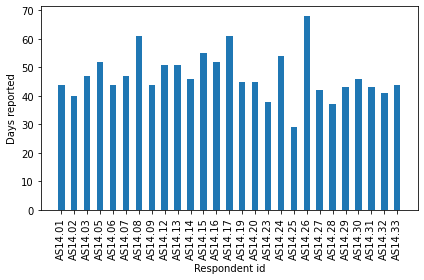

In [16]:
# num reported days per id
plt.bar(x=df_wide_relevant['id'].unique(), height=reported_days, width=0.5)
# plt.scatter(*zip(*reported_days))
plt.xticks(rotation='vertical')
plt.xlabel('Respondent id')
plt.ylabel('Days reported')
plt.tight_layout()
plt.savefig('ReportedDays.pdf')
plt.show()


In [17]:
df_daily = df_wide_relevant.groupby([pd.Grouper(key='time', freq='D'), 'id']).agg({'mood': ['min', 'max', 'median', 'mean', 'std', 'count'],
                                                                           'circumplex.arousal': ['min', 'max', 'median', 'mean', 'std', 'count'],
                                                                           'circumplex.valence': ['min', 'max', 'median', 'mean', 'std', 'count'],
                                                                           'affect': ['min', 'max', 'median', 'mean', 'std', 'count'],
                                                                           'activity': ['min', 'max', 'median', 'mean', 'std', 'count'],
                                                                           'screen': ['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'call':'count',
                                                                           'sms':'count',
                                                                           'appCat.builtin':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.communication':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.entertainment':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.finance':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.game':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.office':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.other':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.social':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.travel':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.unknown':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.utilities':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.weather':['min', 'max', 'median', 'mean', 'std', 'count', 'sum']
                                                                           }).reset_index()

In [18]:
display(df_daily)

time       id mood                                        \
                          min  max median      mean       std count   
0    2014-03-04  AS14.17  6.0  8.0    7.0  7.000000  1.414214     2   
1    2014-03-05  AS14.08  5.0  7.0    7.0  6.333333  1.154701     3   
2    2014-03-05  AS14.17  7.0  9.0    8.0  8.000000  1.000000     3   
3    2014-03-06  AS14.08  6.0  8.0    7.0  7.200000  0.836660     5   
4    2014-03-06  AS14.17  6.0  8.0    7.5  7.250000  0.957427     4   
...         ...      ...  ...  ...    ...       ...       ...   ...   
1297 2014-06-04  AS14.24  7.0  7.0    7.0  7.000000  0.000000     4   
1298 2014-06-05  AS14.24  7.0  7.0    7.0  7.000000  0.000000     5   
1299 2014-06-06  AS14.24  7.0  8.0    7.5  7.500000  0.577350     4   
1300 2014-06-07  AS14.24  8.0  8.0    8.0  8.000000       NaN     1   
1301 2014-06-08  AS14.24  6.0  7.0    6.5  6.500000  0.707107     2   

     circumplex.arousal       ... appCat.utilities               \
                    min  max  ...              std count    sum   
0                  -1.0  2.0  ...              NaN     0  0.000   
1                  -1.0  1.0  ...              NaN     0  0.000   
2                   0.0  2.0  ...              NaN     0  0.000   
3                  -1.0  0.0  ...              NaN     0  0.000   
4                   0.0  1.0  ...              NaN     0  0.000   
...                 ...  ...  ...              ...   ...    ...   
1297                0.0  1.0  ...              NaN     0  0.000   
1298               -1.0  1.0  ...              NaN     0  0.000   
1299               -2.0  2.0  ...              NaN     1  2.072   
1300               -1.0 -1.0  ...              NaN     0  0.000   
1301               -2.0 -1.0  ...              NaN     0  0.000   

     appCat.weather                                 
                min max median mean std count  sum  
0               NaN NaN    NaN  NaN NaN     0  0.0  
1               NaN NaN    NaN  NaN NaN     0  0.0  
2               NaN NaN    NaN  NaN NaN     0  0.0  
3               NaN NaN    NaN  NaN NaN     0  0.0  
4               NaN NaN    NaN  NaN NaN     0  0.0  
...             ...  ..    ...  ...  ..   ...  ...  
1297            NaN NaN    NaN  NaN NaN     0  0.0  
1298            NaN NaN    NaN  NaN NaN     0  0.0  
1299            NaN NaN    NaN  NaN NaN     0  0.0  
1300            NaN NaN    NaN  NaN NaN     0  0.0  
1301            NaN NaN    NaN  NaN NaN     0  0.0  

[1302 rows x 125 columns]

C:\Users\doist\anaconda3\envs\Python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


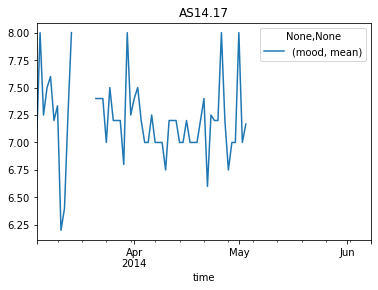

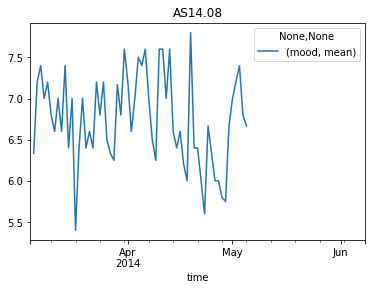

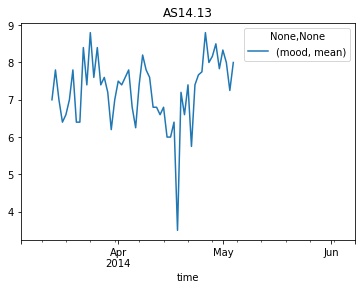

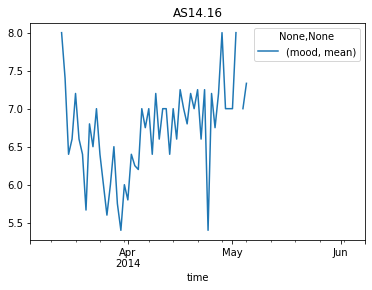

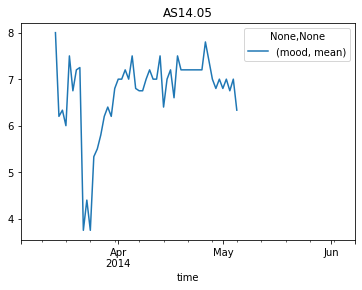

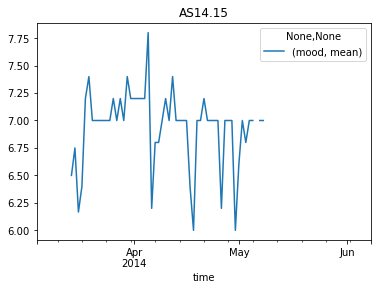

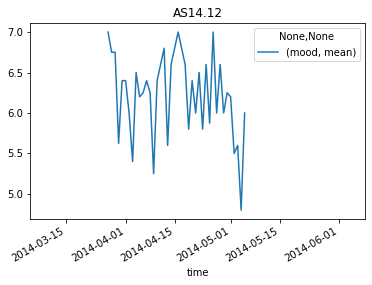

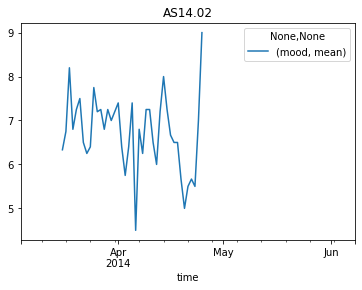

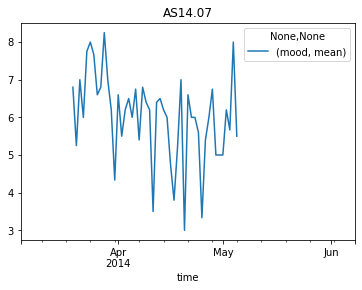

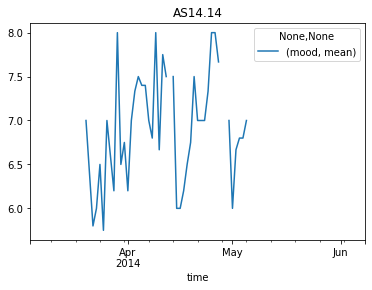

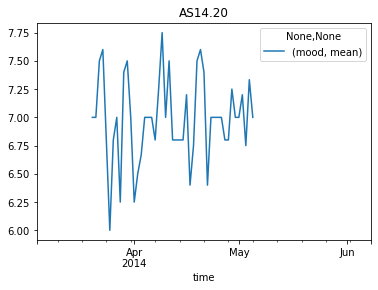

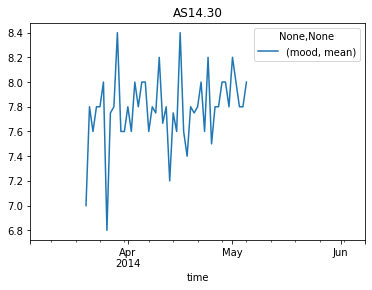

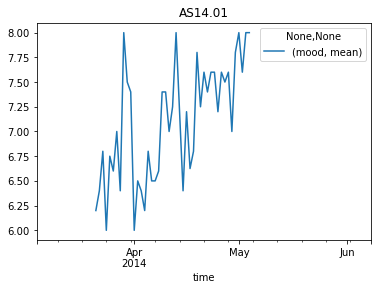

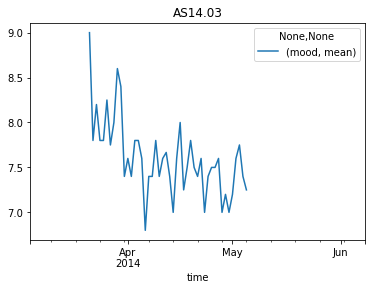

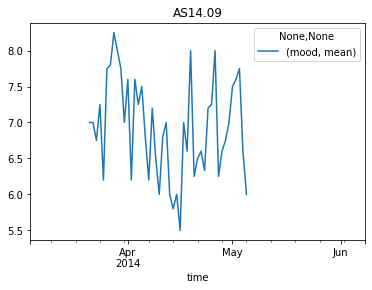

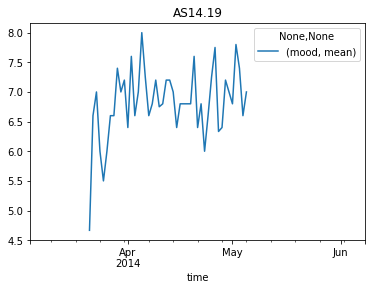

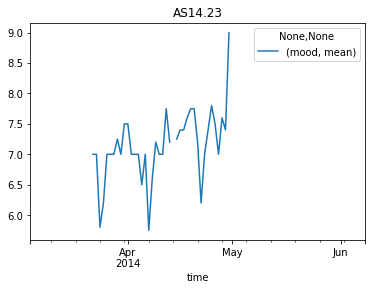

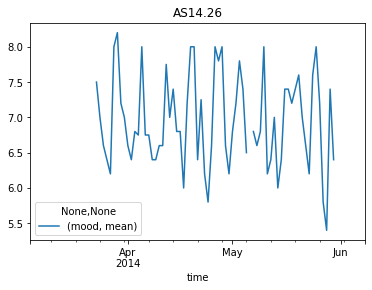

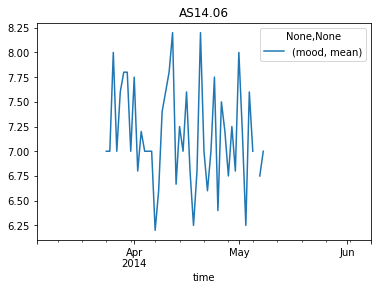

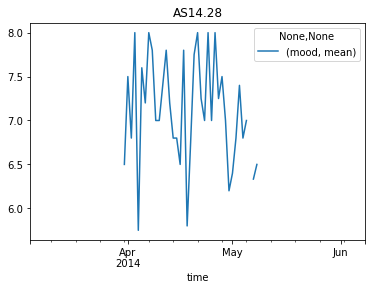

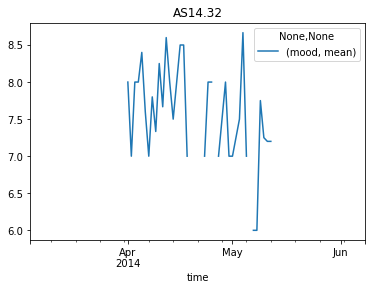

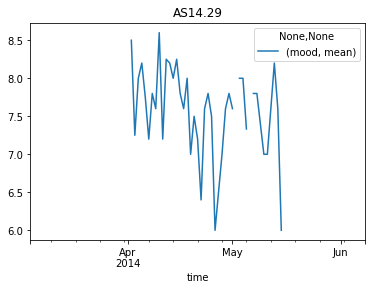

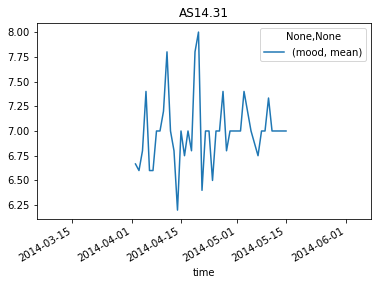

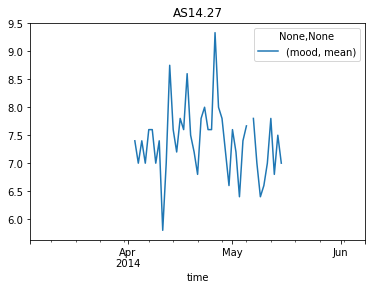

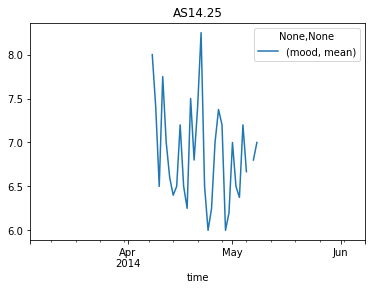

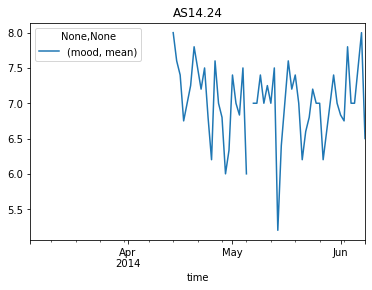

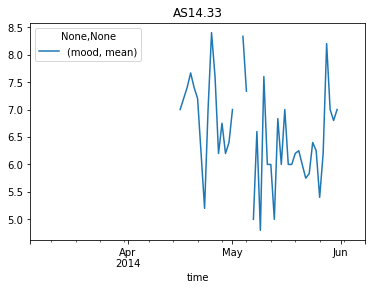

In [19]:
for idx in df_daily['id'].unique():
    df_id = df_daily.loc[df_daily['id']==idx]
    df_id.plot(x='time', y=('mood', 'mean'), title=idx, xlim=(df_wide_relevant['time'].min(), df_wide_relevant['time'].max()))

In [20]:
 ## Fill Nan's for zero columns
cols_count = ['call', 'sms']
cols_time = list(filter(lambda col: col.startswith('appCat.'), variables.tolist())) + ['screen']

df_filled = df_daily[cols_count+cols_time].fillna(0) # Workaround due to MultiIndex on columns fucking up
df_daily.fillna(df_filled, inplace=True)

display(df_daily)

time       id mood                                        \
                          min  max median      mean       std count   
0    2014-03-04  AS14.17  6.0  8.0    7.0  7.000000  1.414214     2   
1    2014-03-05  AS14.08  5.0  7.0    7.0  6.333333  1.154701     3   
2    2014-03-05  AS14.17  7.0  9.0    8.0  8.000000  1.000000     3   
3    2014-03-06  AS14.08  6.0  8.0    7.0  7.200000  0.836660     5   
4    2014-03-06  AS14.17  6.0  8.0    7.5  7.250000  0.957427     4   
...         ...      ...  ...  ...    ...       ...       ...   ...   
1297 2014-06-04  AS14.24  7.0  7.0    7.0  7.000000  0.000000     4   
1298 2014-06-05  AS14.24  7.0  7.0    7.0  7.000000  0.000000     5   
1299 2014-06-06  AS14.24  7.0  8.0    7.5  7.500000  0.577350     4   
1300 2014-06-07  AS14.24  8.0  8.0    8.0  8.000000       NaN     1   
1301 2014-06-08  AS14.24  6.0  7.0    6.5  6.500000  0.707107     2   

     circumplex.arousal       ... appCat.utilities               \
                    min  max  ...              std count    sum   
0                  -1.0  2.0  ...              0.0     0  0.000   
1                  -1.0  1.0  ...              0.0     0  0.000   
2                   0.0  2.0  ...              0.0     0  0.000   
3                  -1.0  0.0  ...              0.0     0  0.000   
4                   0.0  1.0  ...              0.0     0  0.000   
...                 ...  ...  ...              ...   ...    ...   
1297                0.0  1.0  ...              0.0     0  0.000   
1298               -1.0  1.0  ...              0.0     0  0.000   
1299               -2.0  2.0  ...              0.0     1  2.072   
1300               -1.0 -1.0  ...              0.0     0  0.000   
1301               -2.0 -1.0  ...              0.0     0  0.000   

     appCat.weather                                   
                min  max median mean  std count  sum  
0               0.0  0.0    0.0  0.0  0.0     0  0.0  
1               0.0  0.0    0.0  0.0  0.0     0  0.0  
2               0.0  0.0    0.0  0.0  0.0     0  0.0  
3               0.0  0.0    0.0  0.0  0.0     0  0.0  
4               0.0  0.0    0.0  0.0  0.0     0  0.0  
...             ...  ...    ...  ...  ...   ...  ...  
1297            0.0  0.0    0.0  0.0  0.0     0  0.0  
1298            0.0  0.0    0.0  0.0  0.0     0  0.0  
1299            0.0  0.0    0.0  0.0  0.0     0  0.0  
1300            0.0  0.0    0.0  0.0  0.0     0  0.0  
1301            0.0  0.0    0.0  0.0  0.0     0  0.0  

[1302 rows x 125 columns]

In [21]:
## Forward Fill Nan's for score columns
cols_score = ['mood', 'circumplex.arousal', 'circumplex.valence', 'affect', 'activity']

df_temp = df_daily.set_index(['id', 'time']).sort_index()
df_filled = df_temp[cols_score].groupby('id').ffill(limit=3)  # max allowed gap of .. days

df_daily = df_temp.fillna(df_filled).reset_index()

display(df_daily)


id       time mood                                     \
                          min   max median  mean       std count   
0     AS14.01 2014-03-21  6.0   7.0    6.0  6.20  0.447214     5   
1     AS14.01 2014-03-22  5.0   7.0    7.0  6.40  0.894427     5   
2     AS14.01 2014-03-23  6.0   8.0    7.0  6.80  0.836660     5   
3     AS14.01 2014-03-24  5.0   7.0    6.0  6.00  0.707107     5   
4     AS14.01 2014-03-25  6.0   8.0    6.5  6.75  0.957427     4   
...       ...        ...  ...   ...    ...   ...       ...   ...   
1297  AS14.33 2014-05-27  5.0   7.0    6.0  6.20  0.836660     5   
1298  AS14.33 2014-05-28  6.0  10.0    9.0  8.20  1.643168     5   
1299  AS14.33 2014-05-29  7.0   7.0    7.0  7.00  0.000000     3   
1300  AS14.33 2014-05-30  6.0   8.0    6.0  6.80  1.095445     5   
1301  AS14.33 2014-05-31  7.0   7.0    7.0  7.00  1.095445     1   

     circumplex.arousal       ... appCat.utilities                 \
                    min  max  ...              std count      sum   
0                  -1.0  1.0  ...        14.145740    21  317.139   
1                  -1.0  1.0  ...        22.125264     3  117.621   
2                  -1.0  1.0  ...         0.000000     1   30.086   
3                  -1.0  2.0  ...       112.149964     2  178.732   
4                  -1.0  1.0  ...        12.668620    10  222.893   
...                 ...  ...  ...              ...   ...      ...   
1297               -2.0  1.0  ...        19.198292     3   56.173   
1298               -2.0  2.0  ...         2.271551     6   30.666   
1299               -2.0 -1.0  ...         0.581949     2    3.199   
1300               -2.0  1.0  ...        19.301321    15  232.825   
1301               -2.0 -2.0  ...         0.000000     0    0.000   

     appCat.weather                                             
                min     max  median    mean  std count     sum  
0             0.000   0.000   0.000   0.000  0.0     0   0.000  
1             0.000   0.000   0.000   0.000  0.0     0   0.000  
2            30.386  30.386  30.386  30.386  0.0     1  30.386  
3             0.000   0.000   0.000   0.000  0.0     0   0.000  
4             0.000   0.000   0.000   0.000  0.0     0   0.000  
...             ...     ...     ...     ...  ...   ...     ...  
1297          0.000   0.000   0.000   0.000  0.0     0   0.000  
1298          0.000   0.000   0.000   0.000  0.0     0   0.000  
1299          0.000   0.000   0.000   0.000  0.0     0   0.000  
1300          0.000   0.000   0.000   0.000  0.0     0   0.000  
1301          0.000   0.000   0.000   0.000  0.0     0   0.000  

[1302 rows x 125 columns]

In [22]:
## Day of Week dummy variables
# TODO: rekening houden met Dummy Variable trap voor linear or polynomial regressions! => OneHotEncoding
df_daily[['mon', 'thue', 'wed', 'thu', 'fri', 'sat', 'sun']] = pd.get_dummies(df_daily['time'].dt.dayofweek)

display(df_daily.iloc[:, -7:])


,mon,thue,wed,thu,fri,sat,sun
,,,,,,,
0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
1297,0,1,0,0,0,0,0
1298,0,0,1,0,0,0,0
1299,0,0,0,1,0,0,0


In [23]:
## Tabular aggregation
df_temp = df_daily.copy().set_index(['id', 'time']).sort_index()

lookback_days = 5
df_tab = df_temp[cols_score+cols_count+cols_time].rolling(window=lookback_days).mean()
df_tab = pd.concat([df_tab, df_temp[['mon', 'thue', 'wed', 'thu', 'fri', 'sat', 'sun']]], axis=1)   # DayOfWeek excluded from rolling mean
df_tab['target'] = df_temp[('mood', 'mean')].shift(periods=-1) # next day mean mood

display(df_tab)

mood                                        \
                    min  max median      mean       std count   
id      time                                                    
AS14.01 2014-03-21  NaN  NaN    NaN       NaN       NaN   NaN   
        2014-03-22  NaN  NaN    NaN       NaN       NaN   NaN   
        2014-03-23  NaN  NaN    NaN       NaN       NaN   NaN   
        2014-03-24  NaN  NaN    NaN       NaN       NaN   NaN   
        2014-03-25  5.6  7.4    6.5  6.430000  0.768567   4.8   
...                 ...  ...    ...       ...       ...   ...   
AS14.33 2014-05-27  4.2  7.4    6.2  6.016667  1.259839   5.0   
        2014-05-28  4.6  7.8    6.9  6.490000  1.294081   4.8   
        2014-05-29  5.2  7.6    6.9  6.610000  0.990766   4.4   
        2014-05-30  5.4  7.8    6.8  6.720000  1.018370   4.6   
        2014-05-31  6.2  7.8    7.0  7.040000  0.934144   3.8   

                   circumplex.arousal                        ... screen  \
                                  min  max median      mean  ...  count   
id      time                                                 ...          
AS14.01 2014-03-21                NaN  NaN    NaN       NaN  ...    NaN   
        2014-03-22                NaN  NaN    NaN       NaN  ...    NaN   
        2014-03-23                NaN  NaN    NaN       NaN  ...    NaN   
        2014-03-24                NaN  NaN    NaN       NaN  ...    NaN   
        2014-03-25               -1.0  1.2    0.6  0.460000  ...  132.4   
...                               ...  ...    ...       ...  ...    ...   
AS14.33 2014-05-27               -2.0  1.0   -0.8 -0.666667  ...   58.8   
        2014-05-28               -2.0  1.2   -0.4 -0.500000  ...   76.8   
        2014-05-29               -2.0  0.8   -0.4 -0.616667  ...   69.0   
        2014-05-30               -2.0  0.8   -0.4 -0.626667  ...   73.0   
        2014-05-31               -2.0  0.2   -0.8 -0.946667  ...   60.4   

                                 mon thue wed thu fri sat sun target  
                             sum                                      
id      time                                                          
AS14.01 2014-03-21           NaN   0    0   0   0   1   0   0   6.40  
        2014-03-22           NaN   0    0   0   0   0   1   0   6.80  
        2014-03-23           NaN   0    0   0   0   0   0   1   6.00  
        2014-03-24           NaN   1    0   0   0   0   0   0   6.75  
        2014-03-25  12980.041400   0    1   0   0   0   0   0   6.60  
...                          ...  ..  ...  ..  ..  ..  ..  ..    ...  
AS14.33 2014-05-27   9614.496000   0    1   0   0   0   0   0   8.20  
        2014-05-28  11110.705799   0    0   1   0   0   0   0   7.00  
        2014-05-29   9649.552200   0    0   0   1   0   0   0   6.80  
        2014-05-30  10080.584599   0    0   0   0   1   0   0   7.00  
        2014-05-31   6295.547000   0    0   0   0   0   1   0    NaN  

[1302 rows x 131 columns]

In [27]:
df_screentime = df_wide[~df_wide['screen'].isna()]
df_screentime.head(n=10)

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,affect
195,AS14.01,2014-03-21 00:10:43.749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.963,NaN,NaN
199,AS14.01,2014-03-21 02:12:22.811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.136,NaN,NaN
201,AS14.01,2014-03-21 02:59:55.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.218,NaN,NaN
204,AS14.01,2014-03-21 03:12:27.441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374.379,NaN,NaN
210,AS14.01,2014-03-21 03:19:51.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.126,NaN,NaN
212,AS14.01,2014-03-21 03:20:10.997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1923.640,NaN,NaN
228,AS14.01,2014-03-21 08:00:02.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.660,NaN,NaN
235,AS14.01,2014-03-21 08:02:26.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.277,NaN,NaN
241,AS14.01,2014-03-21 09:00:02.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.527,NaN,NaN
245,AS14.01,2014-03-21 09:10:01.789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.711,NaN,NaN


In [29]:
num_of_days_per_user = {}
for user in df_screentime['id'].unique():
    num_of_days_per_user[user] = len(df_screentime[df_screentime['id']==user]['time'].dt.normalize().value_counts())
    
num_of_days_per_user

{'AS14.01': 46,
 'AS14.02': 37,
 'AS14.03': 48,
 'AS14.05': 53,
 'AS14.06': 45,
 'AS14.07': 48,
 'AS14.08': 54,
 'AS14.09': 37,
 'AS14.12': 40,
 'AS14.13': 52,
 'AS14.14': 46,
 'AS14.15': 42,
 'AS14.16': 52,
 'AS14.17': 47,
 'AS14.19': 46,
 'AS14.20': 39,
 'AS14.23': 44,
 'AS14.24': 56,
 'AS14.25': 31,
 'AS14.26': 47,
 'AS14.27': 43,
 'AS14.28': 38,
 'AS14.29': 43,
 'AS14.30': 46,
 'AS14.31': 37,
 'AS14.32': 44,
 'AS14.33': 45}

In [33]:
def get_sleep(df):
    user_sleep = {}
    for user in tqdm(df['id'].unique()):
        user_sleep[user] = {}
        user_sleep[user]['dates'] = []
        user_sleep[user]['bedtimes'] = []
        user_sleep[user]['risetimes'] = []
        user_sleep[user]['duration'] = []
        new_user = True
        prev_row = None
        for idx, row in df[df['id']==user].iterrows():
            if new_user:
                prev_row = row
                new_user = False
                continue
    
            if (row['time'] - prev_row['time']).total_seconds() > 180*60:
                if (row['time'].hour < 12) and row['time'].hour > 4:
                    user_sleep[user]['dates'].append(row['time'].date())
                    user_sleep[user]['risetimes'].append(row['time'])
                    user_sleep[user]['bedtimes'].append(prev_row['time'])
                    user_sleep[user]['duration'].append(row['time'] - prev_row['time'])
            prev_row = row
    return user_sleep

In [34]:
user_sleep = get_sleep(df_screentime)

100%|██████████| 27/27 [00:09<00:00,  2.97it/s]


In [37]:
for user in user_sleep.keys():
    print(user)
    for i in range(0,len(user_sleep[user]['dates'])):
        print('Date: ', user_sleep[user]['dates'][i])
        print('Bedtime: ', user_sleep[user]['bedtimes'][i])
        print('Risetime: ', user_sleep[user]['risetimes'][i])
        print('Duration: ', user_sleep[user]['duration'][i])
        print()

AS14.01
Date:  2014-03-21
Bedtime:  2014-03-21 03:20:10.997000
Risetime:  2014-03-21 08:00:02.102000
Duration:  0 days 04:39:51.105000

Date:  2014-03-22
Bedtime:  2014-03-21 21:56:54.230000
Risetime:  2014-03-22 09:07:39.630000
Duration:  0 days 11:10:45.400000

Date:  2014-03-23
Bedtime:  2014-03-22 23:01:53.628000
Risetime:  2014-03-23 10:13:33.380000
Duration:  0 days 11:11:39.752000

Date:  2014-03-24
Bedtime:  2014-03-24 02:27:36.148000
Risetime:  2014-03-24 08:00:02.029000
Duration:  0 days 05:32:25.881000

Date:  2014-03-25
Bedtime:  2014-03-25 01:45:28.332000
Risetime:  2014-03-25 06:46:03.575000
Duration:  0 days 05:00:35.243000

Date:  2014-03-26
Bedtime:  2014-03-26 03:34:34.569000
Risetime:  2014-03-26 08:35:27.594000
Duration:  0 days 05:00:53.025000

Date:  2014-03-27
Bedtime:  2014-03-27 02:54:00.796000
Risetime:  2014-03-27 07:30:01.698000
Duration:  0 days 04:36:00.902000

Date:  2014-03-28
Bedtime:  2014-03-28 02:50:05.703000
Risetime:  2014-03-28 08:30:02.273000
Dur

Duration:  0 days 06:02:24.204000

Date:  2014-04-27
Bedtime:  2014-04-27 00:31:18.279000
Risetime:  2014-04-27 09:10:58.042000
Duration:  0 days 08:39:39.763000

Date:  2014-04-28
Bedtime:  2014-04-27 23:18:09.773000
Risetime:  2014-04-28 07:26:20.515000
Duration:  0 days 08:08:10.742000

Date:  2014-04-29
Bedtime:  2014-04-29 01:51:06.464000
Risetime:  2014-04-29 06:56:06.878000
Duration:  0 days 05:05:00.414000

Date:  2014-05-02
Bedtime:  2014-05-02 03:43:23.716000
Risetime:  2014-05-02 08:08:39.132000
Duration:  0 days 04:25:15.416000

AS14.08
Date:  2014-03-14
Bedtime:  2014-03-14 00:11:52.440000
Risetime:  2014-03-14 07:36:01.242000
Duration:  0 days 07:24:08.802000

Date:  2014-03-15
Bedtime:  2014-03-15 02:05:16.112000
Risetime:  2014-03-15 07:59:29.801000
Duration:  0 days 05:54:13.689000

Date:  2014-03-16
Bedtime:  2014-03-16 01:28:20.411000
Risetime:  2014-03-16 08:08:46.602000
Duration:  0 days 06:40:26.191000

Date:  2014-03-17
Bedtime:  2014-03-16 20:40:55.444000
Riseti

Date:  2014-04-17
Bedtime:  2014-04-16 21:40:05.413000
Risetime:  2014-04-17 09:03:14.605000
Duration:  0 days 11:23:09.192000

Date:  2014-04-21
Bedtime:  2014-04-19 22:41:21.671000
Risetime:  2014-04-21 09:28:43.867000
Duration:  1 days 10:47:22.196000

Date:  2014-04-25
Bedtime:  2014-04-24 15:20:53.236000
Risetime:  2014-04-25 08:30:02.095000
Duration:  0 days 17:09:08.859000

Date:  2014-04-26
Bedtime:  2014-04-25 08:30:02.095000
Risetime:  2014-04-26 10:40:50.994000
Duration:  1 days 02:10:48.899000

Date:  2014-04-27
Bedtime:  2014-04-26 11:15:55.575000
Risetime:  2014-04-27 11:40:10.234000
Duration:  1 days 00:24:14.659000

Date:  2014-05-05
Bedtime:  2014-05-03 17:25:33.911000
Risetime:  2014-05-05 08:30:01.805000
Duration:  1 days 15:04:27.894000

AS14.16
Date:  2014-03-18
Bedtime:  2014-03-18 00:44:31.102000
Risetime:  2014-03-18 09:00:01.418000
Duration:  0 days 08:15:30.316000

Date:  2014-03-19
Bedtime:  2014-03-18 22:47:21.453000
Risetime:  2014-03-19 07:14:50.306000
Dur

Risetime:  2014-04-20 09:55:01.841000
Duration:  0 days 06:35:49.141000

Date:  2014-04-21
Bedtime:  2014-04-21 01:42:51.641000
Risetime:  2014-04-21 08:00:01.782000
Duration:  0 days 06:17:10.141000

Date:  2014-04-22
Bedtime:  2014-04-22 02:23:16.987000
Risetime:  2014-04-22 06:15:01.770000
Duration:  0 days 03:51:44.783000

Date:  2014-04-22
Bedtime:  2014-04-22 06:50:43.556000
Risetime:  2014-04-22 10:03:54.187000
Duration:  0 days 03:13:10.631000

Date:  2014-04-23
Bedtime:  2014-04-23 02:18:12.384000
Risetime:  2014-04-23 07:45:01.530000
Duration:  0 days 05:26:49.146000

Date:  2014-04-24
Bedtime:  2014-04-24 02:20:48.559000
Risetime:  2014-04-24 07:45:01.918000
Duration:  0 days 05:24:13.359000

Date:  2014-04-25
Bedtime:  2014-04-25 02:24:45.539000
Risetime:  2014-04-25 07:45:02.035000
Duration:  0 days 05:20:16.496000

Date:  2014-04-27
Bedtime:  2014-04-26 23:16:11.119000
Risetime:  2014-04-27 11:29:22.174000
Duration:  0 days 12:13:11.055000

Date:  2014-04-28
Bedtime:  201

Duration:  0 days 03:33:54.273000

Date:  2014-04-12
Bedtime:  2014-04-12 01:02:27.773000
Risetime:  2014-04-12 10:09:03.982000
Duration:  0 days 09:06:36.209000

Date:  2014-04-13
Bedtime:  2014-04-13 03:09:55.444000
Risetime:  2014-04-13 09:31:50.918000
Duration:  0 days 06:21:55.474000

Date:  2014-04-14
Bedtime:  2014-04-14 01:49:05.260000
Risetime:  2014-04-14 06:21:07.198000
Duration:  0 days 04:32:01.938000

Date:  2014-04-15
Bedtime:  2014-04-14 22:50:58.055000
Risetime:  2014-04-15 06:10:46.378000
Duration:  0 days 07:19:48.323000

Date:  2014-04-15
Bedtime:  2014-04-15 07:41:50.984000
Risetime:  2014-04-15 11:23:35.831000
Duration:  0 days 03:41:44.847000

Date:  2014-04-16
Bedtime:  2014-04-15 22:49:54.154000
Risetime:  2014-04-16 06:37:14.355000
Duration:  0 days 07:47:20.201000

Date:  2014-04-17
Bedtime:  2014-04-16 22:49:43.134000
Risetime:  2014-04-17 06:00:02.249000
Duration:  0 days 07:10:19.115000

Date:  2014-04-18
Bedtime:  2014-04-18 01:54:23.176000
Risetime:  201

In [24]:
## TODO: drop nan rows? or don't use burn-in period
df_tab.dropna(axis=0, inplace=True)


In [25]:
# dummy model for all users together
df_data = df_tab.reset_index()
df_data.drop('time', axis=1, inplace=True)
X = df_data.iloc[:, :-1].values
y = df_data.iloc[:, -1].values.reshape(-1, 1)
print(X)
print(y)

[['AS14.01' 5.6 7.4 ... 0 0 0]
 ['AS14.01' 5.6 7.4 ... 0 0 0]
 ['AS14.01' 6.0 7.4 ... 0 0 0]
 ...
 ['AS14.33' 4.6 7.8 ... 0 0 0]
 ['AS14.33' 5.2 7.6 ... 0 0 0]
 ['AS14.33' 5.4 7.8 ... 1 0 0]]
[[6.6]
 [7. ]
 [6.4]
 ...
 [7. ]
 [6.8]
 [7. ]]


C:\Users\Jaimie\Anaconda3\envs\DMT\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [26]:
# Encode user_id
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)
print(X)

[[1.0 0.0 0.0 ... 0 0 0]
 [1.0 0.0 0.0 ... 0 0 0]
 [1.0 0.0 0.0 ... 0 0 0]
 ...
 [0.0 0.0 0.0 ... 0 0 0]
 [0.0 0.0 0.0 ... 0 0 0]
 [0.0 0.0 0.0 ... 1 0 0]]


In [27]:
# Data split
# TODO: should use rolling windows actually
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train)

[[0.0 0.0 0.0 ... 1 0 0]
 [0.0 0.0 0.0 ... 0 0 0]
 [0.0 0.0 0.0 ... 0 0 0]
 ...
 [0.0 0.0 0.0 ... 0 0 0]
 [0.0 0.0 0.0 ... 1 0 0]
 [0.0 0.0 0.0 ... 1 0 0]]


In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

# TODO: Don't scale the categories
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)


In [29]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [30]:
# Training the Support Vector Regression model on the Training set
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train.ravel())

SVR()

In [32]:
y_pred_scaled = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred_scaled)

from sklearn.metrics import mean_squared_error
print(f"MSE: {mean_squared_error(y_test, y_pred)}")















MSE: 0.3231811269444771


# ARIMA

In [123]:
df_arima = pd.DataFrame()
df_arima['id'] = df_daily['id'].copy()
df_arima['date'] = df_daily['time'].copy()
df_arima['mood_score'] = list(df_daily['mood']['mean'].copy())
len(df_arima)

1302

In [124]:
df_arima

,id,date,mood_score
0,AS14.01,2014-03-21,6.20
1,AS14.01,2014-03-22,6.40
2,AS14.01,2014-03-23,6.80
3,AS14.01,2014-03-24,6.00
4,AS14.01,2014-03-25,6.75
...,...,...,...
1297,AS14.33,2014-05-27,6.20
1298,AS14.33,2014-05-28,8.20
1299,AS14.33,2014-05-29,7.00
1300,AS14.33,2014-05-30,6.80
